# Caso Práctico Colaborativo - Bloque 2
## Scouting y Análisis Táctico con Datos
### SOLUCIÓN COMPLETA

**Equipo:** Analistas de Scouting Pro  
**Integrantes:** [Ejemplo de equipo]  
**Fecha:** Octubre 2024

---

## Contexto del Problema

Como analistas de datos especializados en scouting, hemos sido contratados por una academia de fútbol profesional para crear un sistema de búsqueda de talentos basado en estadísticas. Nuestro objetivo es identificar patrones en el rendimiento de jugadores jóvenes para optimizar las decisiones de reclutamiento.

## Objetivos de Aprendizaje:
- Aplicar técnicas de exploración de datos en contextos deportivos
- Crear visualizaciones informativas con seaborn y matplotlib
- Realizar análisis estadístico descriptivo avanzado
- Identificar patrones y tendencias en datos deportivos
- Comunicar hallazgos técnicos a audiencias no técnicas

In [2]:
# Importaciones necesarias para análisis de datos deportivos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Configuración básica de matplotlib
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

# Intentar importar seaborn si está disponible
try:
    import seaborn as sns
    sns.set_theme(style="whitegrid", palette="Set2")
    SEABORN_AVAILABLE = True
    print("✅ Seaborn disponible - gráficos avanzados habilitados")
except ImportError:
    SEABORN_AVAILABLE = False
    print("⚠️  Seaborn no disponible - usando matplotlib básico")

try:
    from sklearn.linear_model import LinearRegression
    SKLEARN_AVAILABLE = True
    print("✅ Scikit-learn disponible - modelos predictivos habilitados")
except ImportError:
    SKLEARN_AVAILABLE = False
    print("⚠️  Scikit-learn no disponible - usando análisis estadístico básico")

print("¡Herramientas de análisis avanzado listas!")
print(f"Pandas: {pd.__version__} | NumPy: {np.__version__}")
print(f"Matplotlib: {plt.matplotlib.__version__}")
if SEABORN_AVAILABLE:
    print(f"Seaborn: {sns.__version__}")

⚠️  Seaborn no disponible - usando matplotlib básico
⚠️  Scikit-learn no disponible - usando análisis estadístico básico
¡Herramientas de análisis avanzado listas!
Pandas: 2.3.1 | NumPy: 2.2.6
Matplotlib: 3.10.3


In [3]:
# Cargar los datasets del sistema de scouting
print("📊 Cargando datasets del sistema de scouting...")

# Dataset principal de jugadores
df_jugadores = pd.read_csv('../datasets/jugadores_liga_juvenil.csv')
print(f"✅ Jugadores cargados: {len(df_jugadores)} registros")

# Dataset de detalles de partidos
df_partidos = pd.read_csv('../datasets/partidos_detalle.csv')
print(f"✅ Partidos cargados: {len(df_partidos)} registros")

# Dataset de eventos durante los partidos
df_eventos = pd.read_csv('../datasets/eventos_partidos.csv')
print(f"✅ Eventos cargados: {len(df_eventos)} registros")

print(f"\n🎯 Sistema de scouting inicializado correctamente")
print(f"Total de datos disponibles: {len(df_jugadores)} jugadores, {len(df_partidos)} partidos, {len(df_eventos)} eventos")

📊 Cargando datasets del sistema de scouting...
✅ Jugadores cargados: 50 registros
✅ Partidos cargados: 50 registros
✅ Eventos cargados: 100 registros

🎯 Sistema de scouting inicializado correctamente
Total de datos disponibles: 50 jugadores, 50 partidos, 100 eventos


## 1.2 Análisis Exploratorio de Datos (15 puntos)

In [4]:
def analizar_dataset(df, nombre_dataset):
    """
    Función para análisis exploratorio estandarizado
    Proporciona un resumen completo de la estructura y calidad de los datos
    """
    print(f"\n=== ANÁLISIS DE {nombre_dataset.upper()} ===")
    print(f"📏 Dimensiones: {df.shape[0]} filas × {df.shape[1]} columnas")
    print(f"📋 Columnas: {list(df.columns)}")
    
    print(f"\n🔍 Valores faltantes por columna:")
    valores_faltantes = df.isnull().sum()
    if valores_faltantes.sum() == 0:
        print("   ✅ ¡Excelente! No hay valores faltantes")
    else:
        for col, missing in valores_faltantes[valores_faltantes > 0].items():
            porcentaje = (missing / len(df)) * 100
            print(f"   ⚠️  {col}: {missing} ({porcentaje:.1f}%)")
    
    print(f"\n📊 Estadísticas descriptivas de variables numéricas:")
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    if len(numeric_cols) > 0:
        print(df[numeric_cols].describe().round(2))
    
    print(f"\n🏷️ Variables categóricas y sus valores únicos:")
    categorical_cols = df.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        unique_values = df[col].nunique()
        print(f"   • {col}: {unique_values} valores únicos")
        if unique_values <= 10:
            print(f"     Valores: {list(df[col].unique())}")
    
    return df.info()

# Aplicar análisis a cada dataset
analizar_dataset(df_jugadores, "jugadores liga juvenil")


=== ANÁLISIS DE JUGADORES LIGA JUVENIL ===
📏 Dimensiones: 50 filas × 16 columnas
📋 Columnas: ['jugador_id', 'nombre', 'edad', 'equipo', 'posicion', 'torneo', 'goles', 'asistencias', 'partidos_jugados', 'minutos_jugados', 'tiros_al_arco', 'precision_pases', 'recuperaciones', 'tarjetas_amarillas', 'tarjetas_rojas', 'valor_mercado_estimado']

🔍 Valores faltantes por columna:
   ✅ ¡Excelente! No hay valores faltantes

📊 Estadísticas descriptivas de variables numéricas:
       jugador_id   edad  goles  asistencias  partidos_jugados  \
count       50.00  50.00  50.00        50.00             50.00   
mean        25.50  16.98   5.40         5.84             19.08   
std         14.58   0.82   4.63         4.70              1.85   
min          1.00  16.00   0.00         0.00             14.00   
25%         13.25  16.00   1.25         2.00             18.00   
50%         25.50  17.00   4.00         5.00             19.00   
75%         37.75  18.00   8.75         8.75             20.00   
m

In [5]:
analizar_dataset(df_partidos, "partidos detalle")


=== ANÁLISIS DE PARTIDOS DETALLE ===
📏 Dimensiones: 50 filas × 8 columnas
📋 Columnas: ['partido_id', 'fecha', 'equipo_local', 'equipo_visitante', 'goles_local', 'goles_visitante', 'competicion', 'asistencia']

🔍 Valores faltantes por columna:
   ✅ ¡Excelente! No hay valores faltantes

📊 Estadísticas descriptivas de variables numéricas:
       partido_id  goles_local  goles_visitante  asistencia
count       50.00        50.00            50.00       50.00
mean       125.50         1.40             1.26     3862.00
std         14.58         0.97             0.99     1164.77
min        101.00         0.00             0.00     2100.00
25%        113.25         1.00             1.00     2900.00
50%        125.50         1.00             1.00     3650.00
75%        137.75         2.00             2.00     4675.00
max        150.00         3.00             4.00     6500.00

🏷️ Variables categóricas y sus valores únicos:
   • fecha: 50 valores únicos
   • equipo_local: 35 valores únicos
   • e

In [6]:
analizar_dataset(df_eventos, "eventos partidos")


=== ANÁLISIS DE EVENTOS PARTIDOS ===
📏 Dimensiones: 100 filas × 8 columnas
📋 Columnas: ['evento_id', 'partido_id', 'minuto', 'jugador_id', 'tipo_evento', 'equipo', 'posicion_campo_x', 'posicion_campo_y']

🔍 Valores faltantes por columna:
   ✅ ¡Excelente! No hay valores faltantes

📊 Estadísticas descriptivas de variables numéricas:
       evento_id  partido_id  minuto  jugador_id  posicion_campo_x  \
count     100.00      100.00  100.00      100.00            100.00   
mean       50.50      110.38   54.55       21.06             77.60   
std        29.01        5.93   23.47       13.39             14.41   
min         1.00      101.00    8.00        1.00             38.90   
25%        25.75      105.75   34.00        9.75             70.35   
50%        50.50      110.50   58.00       20.00             85.35   
75%        75.25      115.00   74.25       31.25             87.22   
max       100.00      121.00   92.00       46.00             91.20   

       posicion_campo_y  
count    

In [7]:
# Análisis específico de distribuciones clave para scouting
print("🎯 ANÁLISIS ESPECÍFICO PARA SCOUTING")
print("=" * 50)

# Distribución de edades por posición
print("\n👥 DISTRIBUCIÓN DE EDADES POR POSICIÓN:")
edad_por_posicion = df_jugadores.groupby('posicion')['edad'].agg(['mean', 'min', 'max', 'std']).round(1)
print(edad_por_posicion)

# Distribución de goles por competición
print("\n⚽ DISTRIBUCIÓN DE GOLES POR COMPETICIÓN:")
goles_por_competicion = df_jugadores.groupby('torneo')['goles'].agg(['mean', 'sum', 'max']).round(1)
print(goles_por_competicion)

# Análisis de valores de mercado
print("\n💰 ANÁLISIS DE VALORES DE MERCADO:")
print(f"Valor promedio: ${df_jugadores['valor_mercado_estimado'].mean():,.0f}")
print(f"Valor mediano: ${df_jugadores['valor_mercado_estimado'].median():,.0f}")
print(f"Rango: ${df_jugadores['valor_mercado_estimado'].min():,.0f} - ${df_jugadores['valor_mercado_estimado'].max():,.0f}")

# Identificar valores atípicos en rendimiento
print("\n🎯 ANÁLISIS DE VALORES ATÍPICOS:")
q1_goles = df_jugadores['goles'].quantile(0.25)
q3_goles = df_jugadores['goles'].quantile(0.75)
iqr_goles = q3_goles - q1_goles
limite_superior = q3_goles + 1.5 * iqr_goles

outliers_goles = df_jugadores[df_jugadores['goles'] > limite_superior]
print(f"Jugadores con rendimiento goleador excepcional: {len(outliers_goles)}")
if len(outliers_goles) > 0:
    print("Top goleadores atípicos:")
    for idx, jugador in outliers_goles.nlargest(3, 'goles').iterrows():
        print(f"  • {jugador['nombre']} ({jugador['edad']} años): {jugador['goles']} goles - {jugador['posicion']}")

🎯 ANÁLISIS ESPECÍFICO PARA SCOUTING

👥 DISTRIBUCIÓN DE EDADES POR POSICIÓN:
            mean  min  max  std
posicion                       
Defensa     16.9   16   18  0.9
Delantero   17.1   16   18  0.8
Mediocampo  16.9   16   18  0.8
Portero     16.9   16   18  0.9

⚽ DISTRIBUCIÓN DE GOLES POR COMPETICIÓN:
                        mean  sum  max
torneo                                
Liga MX Femenil Sub-18   5.0  124   14
Liga MX Sub-20           5.8  146   16

💰 ANÁLISIS DE VALORES DE MERCADO:
Valor promedio: $149,860
Valor mediano: $150,000
Rango: $105,000 - $200,000

🎯 ANÁLISIS DE VALORES ATÍPICOS:
Jugadores con rendimiento goleador excepcional: 0


## 1.3 Limpieza de Datos (10 puntos)

In [8]:
# Limpieza y preparación de datos para análisis de scouting
print("🧹 PROCESO DE LIMPIEZA DE DATOS")
print("=" * 40)

# 1. Verificar y limpiar valores faltantes
print("\n1️⃣ Verificando valores faltantes...")
total_faltantes = df_jugadores.isnull().sum().sum()
if total_faltantes == 0:
    print("   ✅ No se encontraron valores faltantes")
else:
    print(f"   ⚠️  Se encontraron {total_faltantes} valores faltantes")
    # Aquí se implementaría la lógica de manejo según el tipo de columna

# 2. Normalizar nombres de equipos y posiciones
print("\n2️⃣ Normalizando categorías...")
# Verificar consistencia en nombres de posiciones
posiciones_unicas = df_jugadores['posicion'].unique()
print(f"   Posiciones encontradas: {list(posiciones_unicas)}")

# Verificar consistencia en nombres de torneos
torneos_unicos = df_jugadores['torneo'].unique()
print(f"   Torneos encontrados: {list(torneos_unicos)}")

# 3. Crear variables derivadas para análisis de scouting
print("\n3️⃣ Creando variables derivadas para scouting...")

# Variables de eficiencia
df_jugadores['goles_por_partido'] = df_jugadores['goles'] / df_jugadores['partidos_jugados']
df_jugadores['asistencias_por_partido'] = df_jugadores['asistencias'] / df_jugadores['partidos_jugados']
df_jugadores['minutos_por_partido'] = df_jugadores['minutos_jugados'] / df_jugadores['partidos_jugados']

# Eficiencia de tiro (solo para jugadores con tiros)
df_jugadores['eficiencia_tiros'] = np.where(
    df_jugadores['tiros_al_arco'] > 0,
    df_jugadores['goles'] / df_jugadores['tiros_al_arco'] * 100,
    0
)

# Índice de contribución ofensiva
df_jugadores['contribucion_ofensiva'] = df_jugadores['goles'] + (df_jugadores['asistencias'] * 0.7)

# Categorización por edad
df_jugadores['categoria_edad'] = pd.cut(
    df_jugadores['edad'], 
    bins=[15, 16, 17, 18, 19], 
    labels=['16 años', '17 años', '18 años', '19+ años'],
    include_lowest=True
)

# Índice de disciplina (menos tarjetas es mejor)
df_jugadores['indice_disciplina'] = np.where(
    df_jugadores['partidos_jugados'] > 0,
    100 - ((df_jugadores['tarjetas_amarillas'] * 2 + df_jugadores['tarjetas_rojas'] * 10) / 
           df_jugadores['partidos_jugados'] * 10),
    100
)
df_jugadores['indice_disciplina'] = df_jugadores['indice_disciplina'].clip(0, 100)

print(f"   ✅ Variables creadas: goles_por_partido, asistencias_por_partido, eficiencia_tiros")
print(f"   ✅ Variables creadas: contribucion_ofensiva, categoria_edad, indice_disciplina")

# 4. Validar rangos lógicos
print("\n4️⃣ Validando rangos lógicos...")

# Verificar rangos de edad
edades_invalidas = df_jugadores[(df_jugadores['edad'] < 15) | (df_jugadores['edad'] > 20)]
print(f"   Edades fuera de rango (15-20): {len(edades_invalidas)} jugadores")

# Verificar minutos jugados vs partidos
minutos_invalidos = df_jugadores[df_jugadores['minutos_por_partido'] > 90]
print(f"   Minutos por partido > 90: {len(minutos_invalidos)} casos")

# Verificar precisión de pases
precision_invalida = df_jugadores[(df_jugadores['precision_pases'] < 0) | (df_jugadores['precision_pases'] > 100)]
print(f"   Precisión de pases fuera de rango (0-100%): {len(precision_invalida)} casos")

print(f"\n✅ Proceso de limpieza completado")
print(f"📊 Dataset final: {df_jugadores.shape[0]} jugadores con {df_jugadores.shape[1]} variables")

🧹 PROCESO DE LIMPIEZA DE DATOS

1️⃣ Verificando valores faltantes...
   ✅ No se encontraron valores faltantes

2️⃣ Normalizando categorías...
   Posiciones encontradas: ['Delantero', 'Mediocampo', 'Defensa', 'Portero']
   Torneos encontrados: ['Liga MX Sub-20', 'Liga MX Femenil Sub-18']

3️⃣ Creando variables derivadas para scouting...
   ✅ Variables creadas: goles_por_partido, asistencias_por_partido, eficiencia_tiros
   ✅ Variables creadas: contribucion_ofensiva, categoria_edad, indice_disciplina

4️⃣ Validando rangos lógicos...
   Edades fuera de rango (15-20): 0 jugadores
   Minutos por partido > 90: 0 casos
   Precisión de pases fuera de rango (0-100%): 0 casos

✅ Proceso de limpieza completado
📊 Dataset final: 50 jugadores con 23 variables


---
# PARTE 2: ANÁLISIS ESTADÍSTICO AVANZADO (40 puntos)

## 2.1 Estadística Descriptiva por Categorías (15 puntos)

In [9]:
def analizar_por_posicion(df):
    """
    Análisis comparativo de rendimiento por posición
    Esencial para entender los perfiles de cada posición en scouting
    """
    print("⚽ ANÁLISIS COMPARATIVO POR POSICIÓN")
    print("=" * 45)
    
    # Estadísticas agregadas por posición
    stats_posicion = df.groupby('posicion').agg({
        'goles': ['count', 'mean', 'median', 'std', 'max'],
        'asistencias': ['mean', 'median', 'max'],
        'precision_pases': ['mean', 'std'],
        'edad': ['mean', 'std'],
        'valor_mercado_estimado': ['mean', 'median', 'max'],
        'goles_por_partido': ['mean', 'std'],
        'contribucion_ofensiva': ['mean', 'max'],
        'indice_disciplina': ['mean', 'std']
    }).round(2)
    
    # Aplanar el índice de columnas para mejor visualización
    stats_posicion.columns = ['_'.join(col).strip() for col in stats_posicion.columns.values]
    
    print("\n📊 Estadísticas Completas por Posición:")
    print(stats_posicion)
    
    # Análisis específico por posición
    print("\n🎯 INSIGHTS POR POSICIÓN:")
    for posicion in df['posicion'].unique():
        datos_pos = df[df['posicion'] == posicion]
        print(f"\n{posicion}s ({len(datos_pos)} jugadores):")
        print(f"  • Promedio goles/partido: {datos_pos['goles_por_partido'].mean():.2f}")
        print(f"  • Promedio asistencias/partido: {datos_pos['asistencias_por_partido'].mean():.2f}")
        print(f"  • Precisión promedio pases: {datos_pos['precision_pases'].mean():.1f}%")
        print(f"  • Valor promedio mercado: ${datos_pos['valor_mercado_estimado'].mean():,.0f}")
        print(f"  • Edad promedio: {datos_pos['edad'].mean():.1f} años")
        
        # Jugador destacado por posición
        mejor_jugador = datos_pos.loc[datos_pos['contribucion_ofensiva'].idxmax()]
        print(f"  ⭐ Destacado: {mejor_jugador['nombre']} (Contribución: {mejor_jugador['contribucion_ofensiva']:.1f})")
    
    return stats_posicion

# Ejecutar análisis por posición
estadisticas_posicion = analizar_por_posicion(df_jugadores)

⚽ ANÁLISIS COMPARATIVO POR POSICIÓN

📊 Estadísticas Completas por Posición:
            goles_count  goles_mean  goles_median  goles_std  goles_max  \
posicion                                                                  
Defensa              13        1.77           2.0       1.09          4   
Delantero            15       11.07          11.0       2.91         16   
Mediocampo           15        5.40           5.0       2.10          9   
Portero               7        0.00           0.0       0.00          0   

            asistencias_mean  asistencias_median  asistencias_max  \
posicion                                                            
Defensa                 2.85                 3.0                6   
Delantero               4.80                 5.0                8   
Mediocampo             11.87                12.0               18   
Portero                 0.71                 1.0                2   

            precision_pases_mean  precision_pases_std  ...

In [10]:
# Análisis temporal y por competición
print("📅 ANÁLISIS TEMPORAL Y POR COMPETICIÓN")
print("=" * 50)

# Análisis por torneo
print("\n🏆 COMPARACIÓN ENTRE TORNEOS:")
comparacion_torneos = df_jugadores.groupby('torneo').agg({
    'jugador_id': 'count',
    'edad': 'mean',
    'goles_por_partido': 'mean',
    'asistencias_por_partido': 'mean',
    'precision_pases': 'mean',
    'valor_mercado_estimado': 'mean',
    'indice_disciplina': 'mean'
}).round(2)

comparacion_torneos.columns = ['Jugadores', 'Edad_Prom', 'Goles_x_Partido', 
                              'Asist_x_Partido', 'Precision_Pases', 
                              'Valor_Mercado_Prom', 'Disciplina_Prom']

print(comparacion_torneos)

# Análisis de competitividad por torneo
print("\n📊 INDICADORES DE COMPETITIVIDAD:")
for torneo in df_jugadores['torneo'].unique():
    datos_torneo = df_jugadores[df_jugadores['torneo'] == torneo]
    
    # Calcular coeficiente de variación para goles (indica competitividad)
    cv_goles = datos_torneo['goles'].std() / datos_torneo['goles'].mean() if datos_torneo['goles'].mean() > 0 else 0
    
    print(f"\n{torneo}:")
    print(f"  • Jugadores analizados: {len(datos_torneo)}")
    print(f"  • Coeficiente variación goles: {cv_goles:.2f} (mayor = más competitivo)")
    print(f"  • Rango valores mercado: ${datos_torneo['valor_mercado_estimado'].min():,} - ${datos_torneo['valor_mercado_estimado'].max():,}")
    
    # Top 3 jugadores por torneo
    top_jugadores = datos_torneo.nlargest(3, 'contribucion_ofensiva')[['nombre', 'posicion', 'contribucion_ofensiva']]
    print(f"  🌟 Top 3 jugadores:")
    for idx, jugador in top_jugadores.iterrows():
        print(f"     {jugador['nombre']} ({jugador['posicion']}) - {jugador['contribucion_ofensiva']:.1f}")

📅 ANÁLISIS TEMPORAL Y POR COMPETICIÓN

🏆 COMPARACIÓN ENTRE TORNEOS:
                        Jugadores  Edad_Prom  Goles_x_Partido  \
torneo                                                          
Liga MX Femenil Sub-18         25      16.96             0.26   
Liga MX Sub-20                 25      17.00             0.32   

                        Asist_x_Partido  Precision_Pases  Valor_Mercado_Prom  \
torneo                                                                         
Liga MX Femenil Sub-18             0.36            80.51            151320.0   
Liga MX Sub-20                     0.25            79.94            148400.0   

                        Disciplina_Prom  
torneo                                   
Liga MX Femenil Sub-18            97.42  
Liga MX Sub-20                    96.72  

📊 INDICADORES DE COMPETITIVIDAD:

Liga MX Sub-20:
  • Jugadores analizados: 25
  • Coeficiente variación goles: 0.82 (mayor = más competitivo)
  • Rango valores mercado: $105,000 - 

## 2.2 Análisis de Correlaciones (10 puntos)

In [11]:
# Análisis de correlaciones para identificar factores predictivos
print("🔗 ANÁLISIS DE CORRELACIONES PARA SCOUTING")
print("=" * 50)

# Seleccionar variables numéricas relevantes para el análisis
variables_scouting = [
    'edad', 'goles', 'asistencias', 'partidos_jugados', 'minutos_jugados',
    'tiros_al_arco', 'precision_pases', 'recuperaciones', 
    'tarjetas_amarillas', 'tarjetas_rojas', 'valor_mercado_estimado',
    'goles_por_partido', 'asistencias_por_partido', 'eficiencia_tiros',
    'contribucion_ofensiva', 'indice_disciplina'
]

# Calcular matriz de correlación
correlation_matrix = df_jugadores[variables_scouting].corr()

print("\n💰 FACTORES QUE PREDICEN VALOR DE MERCADO:")
correlacion_valor = correlation_matrix['valor_mercado_estimado'].sort_values(key=abs, ascending=False)
print("Variables más correlacionadas con valor de mercado:")
for variable, corr in correlacion_valor.head(8).items():
    if variable != 'valor_mercado_estimado':
        direccion = "📈" if corr > 0 else "📉"
        print(f"  {direccion} {variable}: {corr:.3f}")

print("\n⚽ ANÁLISIS DE CORRELACIONES CLAVE:")

# Correlación entre métricas ofensivas
corr_goles_asist = df_jugadores['goles'].corr(df_jugadores['asistencias'])
print(f"• Goles vs Asistencias: {corr_goles_asist:.3f}")

# Correlación entre disciplina y rendimiento
corr_disciplina_valor = df_jugadores['indice_disciplina'].corr(df_jugadores['valor_mercado_estimado'])
print(f"• Disciplina vs Valor de Mercado: {corr_disciplina_valor:.3f}")

# Correlación entre edad y valor
corr_edad_valor = df_jugadores['edad'].corr(df_jugadores['valor_mercado_estimado'])
print(f"• Edad vs Valor de Mercado: {corr_edad_valor:.3f}")

# Correlación entre eficiencia y valor
corr_eficiencia_valor = df_jugadores['eficiencia_tiros'].corr(df_jugadores['valor_mercado_estimado'])
print(f"• Eficiencia de Tiro vs Valor de Mercado: {corr_eficiencia_valor:.3f}")

print("\n🎯 INSIGHTS DE CORRELACIONES:")
if abs(corr_goles_asist) < 0.3:
    print("• Los goles y asistencias son independientes - buscar especialistas")
elif corr_goles_asist > 0.5:
    print("• Existe sinergia entre goles y asistencias - buscar jugadores completos")

if corr_disciplina_valor > 0.3:
    print("• La disciplina es valorada en el mercado - factor importante")
elif corr_disciplina_valor < 0.1:
    print("• La disciplina no afecta significativamente el valor de mercado")

if abs(corr_edad_valor) < 0.2:
    print("• La edad tiene poco impacto en el valor - oportunidad en veteranos jóvenes")
else:
    print(f"• La edad {'aumenta' if corr_edad_valor > 0 else 'disminuye'} el valor de mercado")

🔗 ANÁLISIS DE CORRELACIONES PARA SCOUTING

💰 FACTORES QUE PREDICEN VALOR DE MERCADO:
Variables más correlacionadas con valor de mercado:
  📈 contribucion_ofensiva: 0.874
  📈 asistencias: 0.800
  📈 asistencias_por_partido: 0.786
  📈 eficiencia_tiros: 0.713
  📈 tiros_al_arco: 0.676
  📈 goles: 0.618
  📈 precision_pases: 0.585

⚽ ANÁLISIS DE CORRELACIONES CLAVE:
• Goles vs Asistencias: 0.237
• Disciplina vs Valor de Mercado: -0.089
• Edad vs Valor de Mercado: 0.244
• Eficiencia de Tiro vs Valor de Mercado: 0.713

🎯 INSIGHTS DE CORRELACIONES:
• Los goles y asistencias son independientes - buscar especialistas
• La disciplina no afecta significativamente el valor de mercado
• La edad aumenta el valor de mercado


## 2.3 Identificación de Patrones (15 puntos)

In [12]:
# Identificación de perfiles de jugadores y patrones de scouting
print("🔍 IDENTIFICACIÓN DE PERFILES DE JUGADORES")
print("=" * 55)

# Crear clusters básicos de tipos de jugadores
print("\n👥 PERFILES DE JUGADORES IDENTIFICADOS:")

# Definir criterios para diferentes perfiles
def clasificar_perfil_jugador(row):
    goles_pp = row['goles_por_partido']
    asist_pp = row['asistencias_por_partido']
    precision = row['precision_pases']
    recuperaciones = row['recuperaciones']
    posicion = row['posicion']
    
    # Perfiles específicos por posición
    if posicion == 'Delantero':
        if goles_pp >= 0.6:
            return 'Goleador Elite'
        elif goles_pp >= 0.4:
            return 'Delantero Sólido'
        elif asist_pp >= 0.3:
            return 'Delantero Asociativo'
        else:
            return 'Delantero en Desarrollo'
    
    elif posicion == 'Mediocampo':
        if asist_pp >= 0.6 and precision >= 85:
            return 'Creador Elite'
        elif goles_pp >= 0.3 and asist_pp >= 0.3:
            return 'Mediocampo Completo'
        elif precision >= 90:
            return 'Distribuidor Técnico'
        elif recuperaciones >= 70:
            return 'Mediocampo Defensivo'
        else:
            return 'Mediocampo Versátil'
    
    elif posicion == 'Defensa':
        if recuperaciones >= 90 and precision >= 88:
            return 'Defensa Elite'
        elif goles_pp >= 0.1:  # Defensas que anotan
            return 'Defensa Ofensivo'
        elif precision >= 90:
            return 'Defensa Constructor'
        else:
            return 'Defensa Sólido'
    
    elif posicion == 'Portero':
        if precision >= 50:  # Porteros con buen juego de pies
            return 'Portero Moderno'
        else:
            return 'Portero Tradicional'
    
    return 'Sin Clasificar'

# Aplicar clasificación
df_jugadores['perfil_jugador'] = df_jugadores.apply(clasificar_perfil_jugador, axis=1)

# Mostrar distribución de perfiles
perfiles_count = df_jugadores['perfil_jugador'].value_counts()
print("\n📊 Distribución de perfiles encontrados:")
for perfil, count in perfiles_count.items():
    porcentaje = (count / len(df_jugadores)) * 100
    print(f"  • {perfil}: {count} jugadores ({porcentaje:.1f}%)")

# Análisis de valor por perfil
print("\n💰 VALOR DE MERCADO PROMEDIO POR PERFIL:")
valor_por_perfil = df_jugadores.groupby('perfil_jugador')['valor_mercado_estimado'].agg(['count', 'mean', 'max']).round(0)
valor_por_perfil.columns = ['Cantidad', 'Valor_Promedio', 'Valor_Máximo']
valor_por_perfil = valor_por_perfil.sort_values('Valor_Promedio', ascending=False)
print(valor_por_perfil)

🔍 IDENTIFICACIÓN DE PERFILES DE JUGADORES

👥 PERFILES DE JUGADORES IDENTIFICADOS:

📊 Distribución de perfiles encontrados:
  • Creador Elite: 9 jugadores (18.0%)
  • Defensa Elite: 9 jugadores (18.0%)
  • Delantero Sólido: 8 jugadores (16.0%)
  • Goleador Elite: 7 jugadores (14.0%)
  • Portero Tradicional: 4 jugadores (8.0%)
  • Mediocampo Completo: 3 jugadores (6.0%)
  • Mediocampo Versátil: 3 jugadores (6.0%)
  • Portero Moderno: 3 jugadores (6.0%)
  • Defensa Ofensivo: 2 jugadores (4.0%)
  • Defensa Sólido: 2 jugadores (4.0%)

💰 VALOR DE MERCADO PROMEDIO POR PERFIL:
                     Cantidad  Valor_Promedio  Valor_Máximo
perfil_jugador                                             
Creador Elite               9        179444.0        200000
Goleador Elite              7        170000.0        190000
Mediocampo Completo         3        161667.0        175000
Mediocampo Versátil         3        155000.0        160000
Delantero Sólido            8        145625.0        170000
Defe

In [13]:
# Identificar jugadores con mejor relación calidad-precio
print("\\n💎 IDENTIFICANDO OPORTUNIDADES DE SCOUTING")
print("-" * 45)

if SKLEARN_AVAILABLE:
    # Variables predictoras del valor de mercado
    variables_predictoras = ['goles_por_partido', 'asistencias_por_partido', 'precision_pases', 
                            'contribucion_ofensiva', 'edad', 'indice_disciplina']
    
    # Preparar datos
    X = df_jugadores[variables_predictoras].fillna(0)
    y = df_jugadores['valor_mercado_estimado']
    
    # Entrenar modelo simple
    from sklearn.linear_model import LinearRegression
    modelo_valor = LinearRegression()
    modelo_valor.fit(X, y)
    
    # Predecir valores esperados
    df_jugadores['valor_esperado'] = modelo_valor.predict(X)
    df_jugadores['diferencia_valor'] = df_jugadores['valor_mercado_estimado'] - df_jugadores['valor_esperado']
    df_jugadores['ratio_valor'] = df_jugadores['valor_mercado_estimado'] / df_jugadores['valor_esperado']
    
    # Identificar jugadores subestimados
    subestimados = df_jugadores[
        (df_jugadores['ratio_valor'] < 0.85) & 
        (df_jugadores['contribucion_ofensiva'] > df_jugadores['contribucion_ofensiva'].median())
    ].sort_values('ratio_valor')
else:
    # Método alternativo sin sklearn
    df_jugadores['indice_valor'] = (df_jugadores['contribucion_ofensiva'] / 
                                   df_jugadores['valor_mercado_estimado'] * 100000).round(3)
    
    # Identificar jugadores subestimados (alto rendimiento, valor bajo)
    mediana_valor = df_jugadores['valor_mercado_estimado'].median()
    mediana_contribucion = df_jugadores['contribucion_ofensiva'].median()
    
    subestimados = df_jugadores[
        (df_jugadores['valor_mercado_estimado'] <= mediana_valor) & 
        (df_jugadores['contribucion_ofensiva'] > mediana_contribucion)
    ].sort_values('indice_valor', ascending=False)

print(f"JUGADORES CON EXCELENTE RELACIÓN CALIDAD-PRECIO: {len(subestimados)}")
if len(subestimados) > 0:
    for idx, jugador in subestimados.head(5).iterrows():
        nombre = jugador['nombre']
        edad = jugador['edad']
        posicion = jugador['posicion']
        valor = jugador['valor_mercado_estimado']
        contribucion = jugador['contribucion_ofensiva']
        equipo = jugador['equipo']
        
        print(f"  🌟 {nombre} ({edad} años, {posicion})")
        if SKLEARN_AVAILABLE:
            valor_esperado = jugador['valor_esperado']
            print(f"      Valor actual: ${valor:,.0f} | Valor esperado: ${valor_esperado:,.0f}")
        else:
            indice = jugador['indice_valor']
            print(f"      Valor: ${valor:,.0f} | Índice calidad-precio: {indice:.3f}")
        print(f"      Contribución: {contribucion:.1f} | Equipo: {equipo}")
        print(f"      Perfil: {jugador['perfil_jugador']}\\n")

# Identificar jugadores sobrevalorados (solo con sklearn)
if SKLEARN_AVAILABLE:
    sobrevalorados = df_jugadores[
        (df_jugadores['ratio_valor'] > 1.15)
    ].sort_values('ratio_valor', ascending=False)

    print(f"\\n⚠️  JUGADORES SOBREVALORADOS ({len(sobrevalorados)} encontrados):")
    print("Precaución en inversiones:")
    for idx, jugador in sobrevalorados.head(3).iterrows():
        print(f"  ⚠️  {jugador['nombre']} ({jugador['edad']} años, {jugador['posicion']})")
        print(f"      Valor actual: ${jugador['valor_mercado_estimado']:,.0f} | Valor esperado: ${jugador['valor_esperado']:,.0f}")
        print(f"      Ratio: {jugador['ratio_valor']:.2f}x")

# Detectar talentos emergentes (jóvenes con alto potencial)
talentos_emergentes = df_jugadores[
    (df_jugadores['edad'] <= 17) &
    (df_jugadores['contribucion_ofensiva'] > df_jugadores['contribucion_ofensiva'].quantile(0.7))
].sort_values('contribucion_ofensiva', ascending=False)

print(f"\\n🚀 TALENTOS EMERGENTES ({len(talentos_emergentes)} encontrados):")
print("Inversión a largo plazo:")
for idx, jugador in talentos_emergentes.head(5).iterrows():
    print(f"  🚀 {jugador['nombre']} ({jugador['edad']} años, {jugador['posicion']})")
    print(f"      Contribución: {jugador['contribucion_ofensiva']:.1f} | Valor: ${jugador['valor_mercado_estimado']:,.0f}")
    print(f"      Equipo: {jugador['equipo']} | Perfil: {jugador['perfil_jugador']}")

\n💎 IDENTIFICANDO OPORTUNIDADES DE SCOUTING
---------------------------------------------
JUGADORES CON EXCELENTE RELACIÓN CALIDAD-PRECIO: 5
  🌟 Alejandro Martínez (17 años, Delantero)
      Valor: $150,000 | Índice calidad-precio: 10.333
      Contribución: 15.5 | Equipo: Atlas Sub-20
      Perfil: Goleador Elite\n
  🌟 Alma Gutiérrez (18 años, Delantero)
      Valor: $145,000 | Índice calidad-precio: 9.103
      Contribución: 13.2 | Equipo: Santos Femenil
      Perfil: Delantero Sólido\n
  🌟 Thiago Espinoza (17 años, Mediocampo)
      Valor: $145,000 | Índice calidad-precio: 8.207
      Contribución: 11.9 | Equipo: Pachuca Sub-20
      Perfil: Mediocampo Completo\n
  🌟 Andrés Ruiz (17 años, Delantero)
      Valor: $145,000 | Índice calidad-precio: 8.138
      Contribución: 11.8 | Equipo: Necaxa Sub-20
      Perfil: Delantero Sólido\n
  🌟 Roberta Vázquez (17 años, Delantero)
      Valor: $140,000 | Índice calidad-precio: 7.714
      Contribución: 10.8 | Equipo: Mazatlán Femenil
      P

📊 CREANDO DASHBOARD DE ANÁLISIS DE SCOUTING


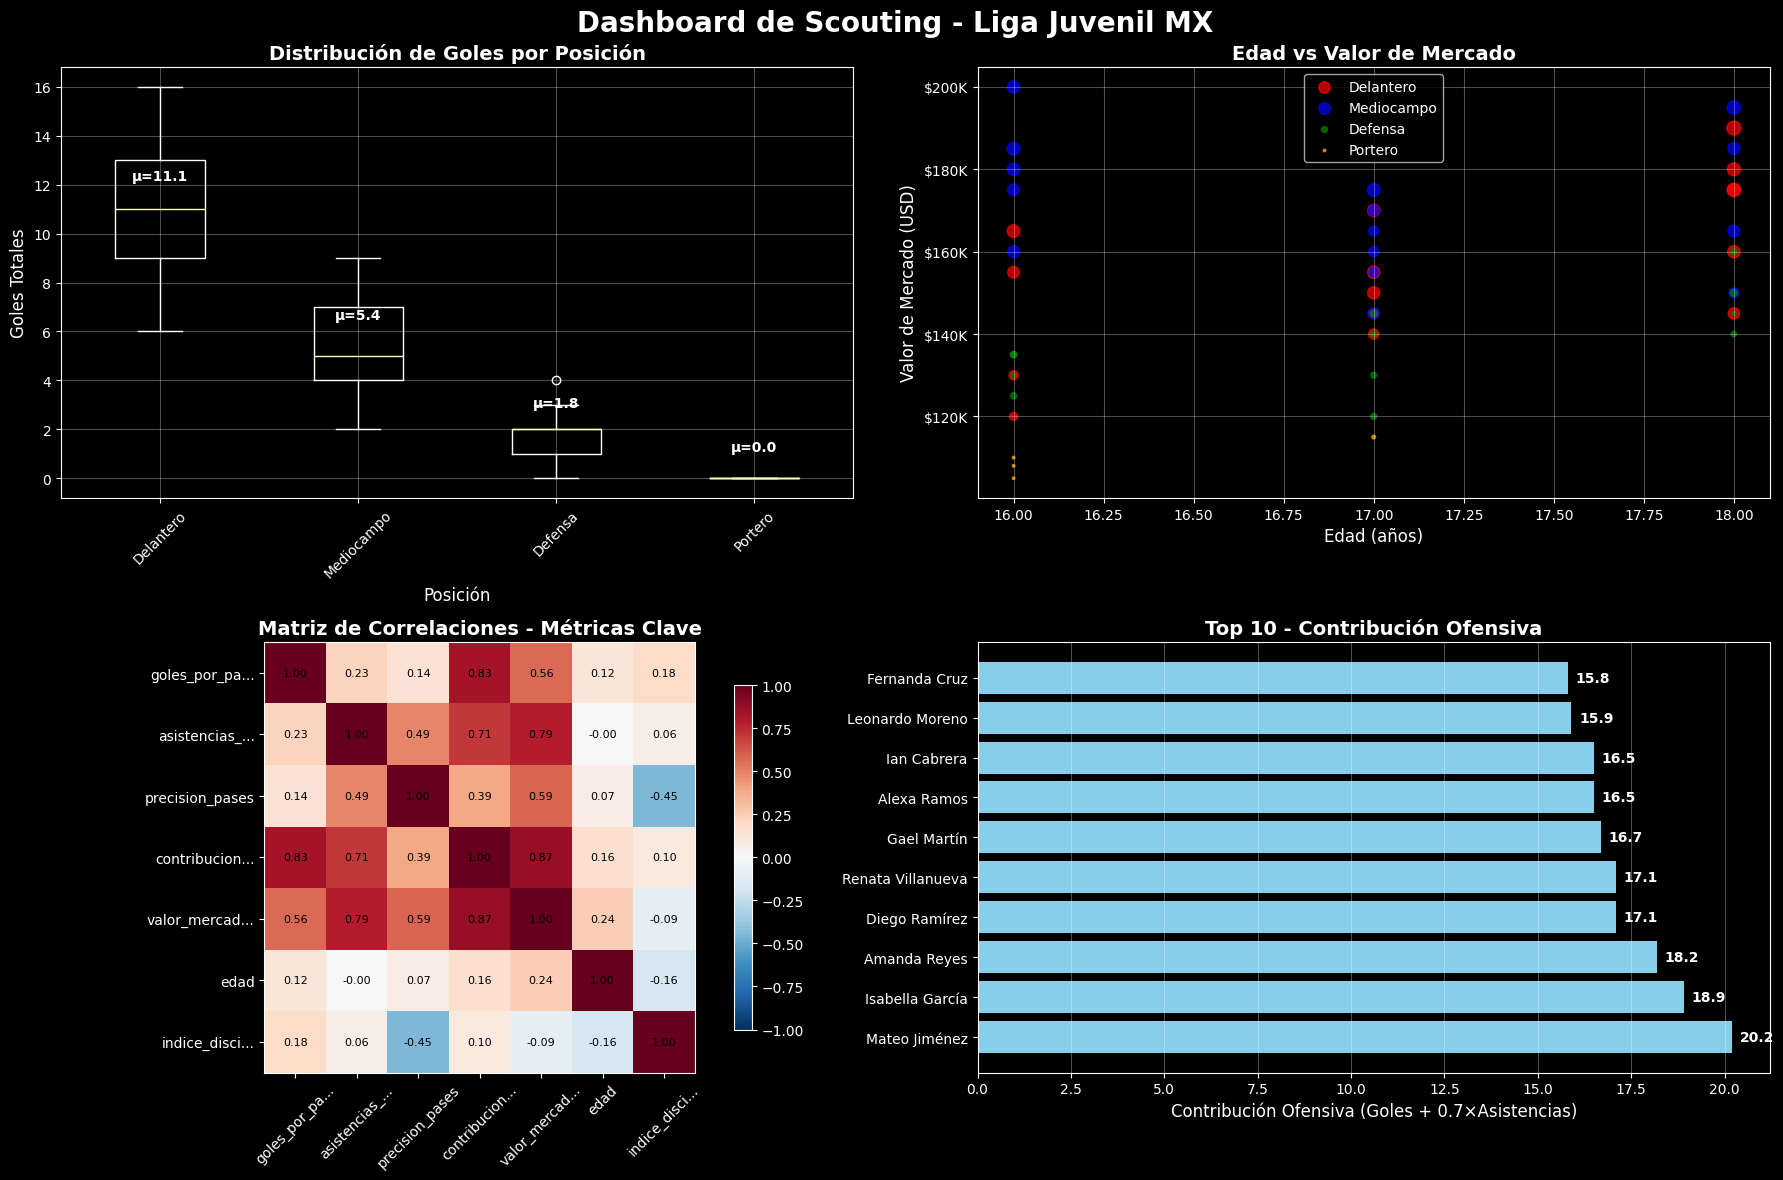


✅ Dashboard principal generado
📈 Muestra distribuciones, correlaciones y rankings clave para scouting


In [14]:
# Dashboard principal de análisis de scouting
print("📊 CREANDO DASHBOARD DE ANÁLISIS DE SCOUTING")
print("=" * 50)

# Configurar el dashboard principal
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Dashboard de Scouting - Liga Juvenil MX', fontsize=20, fontweight='bold')

# Gráfico 1: Distribución de goles por posición (con/sin seaborn)
if SEABORN_AVAILABLE:
    sns.boxplot(data=df_jugadores, x='posicion', y='goles', ax=axes[0,0], palette='Set2')
else:
    # Fallback con matplotlib
    posiciones = df_jugadores['posicion'].unique()
    goles_por_pos = [df_jugadores[df_jugadores['posicion'] == pos]['goles'] for pos in posiciones]
    axes[0,0].boxplot(goles_por_pos, labels=posiciones)

axes[0,0].set_title('Distribución de Goles por Posición', fontsize=14, fontweight='bold')
axes[0,0].set_xlabel('Posición', fontsize=12)
axes[0,0].set_ylabel('Goles Totales', fontsize=12)
axes[0,0].tick_params(axis='x', rotation=45)
axes[0,0].grid(True, alpha=0.3)

# Añadir estadísticas al gráfico
for i, posicion in enumerate(df_jugadores['posicion'].unique()):
    datos_pos = df_jugadores[df_jugadores['posicion'] == posicion]['goles']
    media = datos_pos.mean()
    axes[0,0].text(i+1, media + 1, f'μ={media:.1f}', ha='center', va='bottom', fontweight='bold')

# Gráfico 2: Relación edad vs valor de mercado
if SEABORN_AVAILABLE:
    scatter = sns.scatterplot(data=df_jugadores, x='edad', y='valor_mercado_estimado', 
                             hue='posicion', size='contribucion_ofensiva', 
                             sizes=(50, 200), alpha=0.7, ax=axes[0,1])
else:
    # Fallback con matplotlib - colores por posición
    posiciones = df_jugadores['posicion'].unique()
    colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown']
    
    for i, pos in enumerate(posiciones):
        data_pos = df_jugadores[df_jugadores['posicion'] == pos]
        axes[0,1].scatter(data_pos['edad'], data_pos['valor_mercado_estimado'], 
                         c=colors[i % len(colors)], alpha=0.7, label=pos,
                         s=data_pos['contribucion_ofensiva']*5)
    axes[0,1].legend()

axes[0,1].set_title('Edad vs Valor de Mercado', fontsize=14, fontweight='bold')
axes[0,1].set_xlabel('Edad (años)', fontsize=12)
axes[0,1].set_ylabel('Valor de Mercado (USD)', fontsize=12)
axes[0,1].grid(True, alpha=0.3)

# Formatear eje Y con formato de moneda
axes[0,1].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}K'))

# Gráfico 3: Heatmap de correlaciones (con/sin seaborn)
vars_correlacion = ['goles_por_partido', 'asistencias_por_partido', 'precision_pases', 
                   'contribucion_ofensiva', 'valor_mercado_estimado', 'edad', 'indice_disciplina']
correlation_subset = df_jugadores[vars_correlacion].corr()

if SEABORN_AVAILABLE:
    sns.heatmap(correlation_subset, annot=True, cmap='RdBu_r', center=0, 
                square=True, linewidths=0.5, ax=axes[1,0],
                cbar_kws={"shrink": .8})
else:
    # Fallback con matplotlib
    im = axes[1,0].imshow(correlation_subset.values, cmap='RdBu_r', vmin=-1, vmax=1)
    axes[1,0].set_xticks(range(len(correlation_subset.columns)))
    axes[1,0].set_yticks(range(len(correlation_subset.columns)))
    axes[1,0].set_xticklabels([col[:12] + '...' if len(col) > 15 else col for col in correlation_subset.columns])
    axes[1,0].set_yticklabels([col[:12] + '...' if len(col) > 15 else col for col in correlation_subset.columns])
    
    # Añadir valores de correlación
    for i in range(len(correlation_subset.columns)):
        for j in range(len(correlation_subset.columns)):
            text = axes[1,0].text(j, i, f'{correlation_subset.iloc[i, j]:.2f}',
                                 ha="center", va="center", color="black", fontsize=8)
    
    plt.colorbar(im, ax=axes[1,0], shrink=0.8)

axes[1,0].set_title('Matriz de Correlaciones - Métricas Clave', fontsize=14, fontweight='bold')
axes[1,0].tick_params(axis='x', rotation=45)
axes[1,0].tick_params(axis='y', rotation=0)

# Gráfico 4: Top 10 jugadores por contribución ofensiva
top_contribucion = df_jugadores.nlargest(10, 'contribucion_ofensiva')

if SEABORN_AVAILABLE:
    sns.barplot(data=top_contribucion, y='nombre', x='contribucion_ofensiva', 
                palette='viridis', ax=axes[1,1])
else:
    # Fallback con matplotlib
    y_pos = range(len(top_contribucion))
    axes[1,1].barh(y_pos, top_contribucion['contribucion_ofensiva'], color='skyblue')
    axes[1,1].set_yticks(y_pos)
    axes[1,1].set_yticklabels(top_contribucion['nombre'])

axes[1,1].set_title('Top 10 - Contribución Ofensiva', fontsize=14, fontweight='bold')
axes[1,1].set_xlabel('Contribución Ofensiva (Goles + 0.7×Asistencias)', fontsize=12)
axes[1,1].set_ylabel('')
axes[1,1].grid(True, alpha=0.3, axis='x')

# Añadir valores en las barras
for i, v in enumerate(top_contribucion['contribucion_ofensiva']):
    axes[1,1].text(v + 0.2, i, f'{v:.1f}', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

print("\n✅ Dashboard principal generado")
print("📈 Muestra distribuciones, correlaciones y rankings clave para scouting")

📊 VISUALIZACIONES COMPLEMENTARIAS


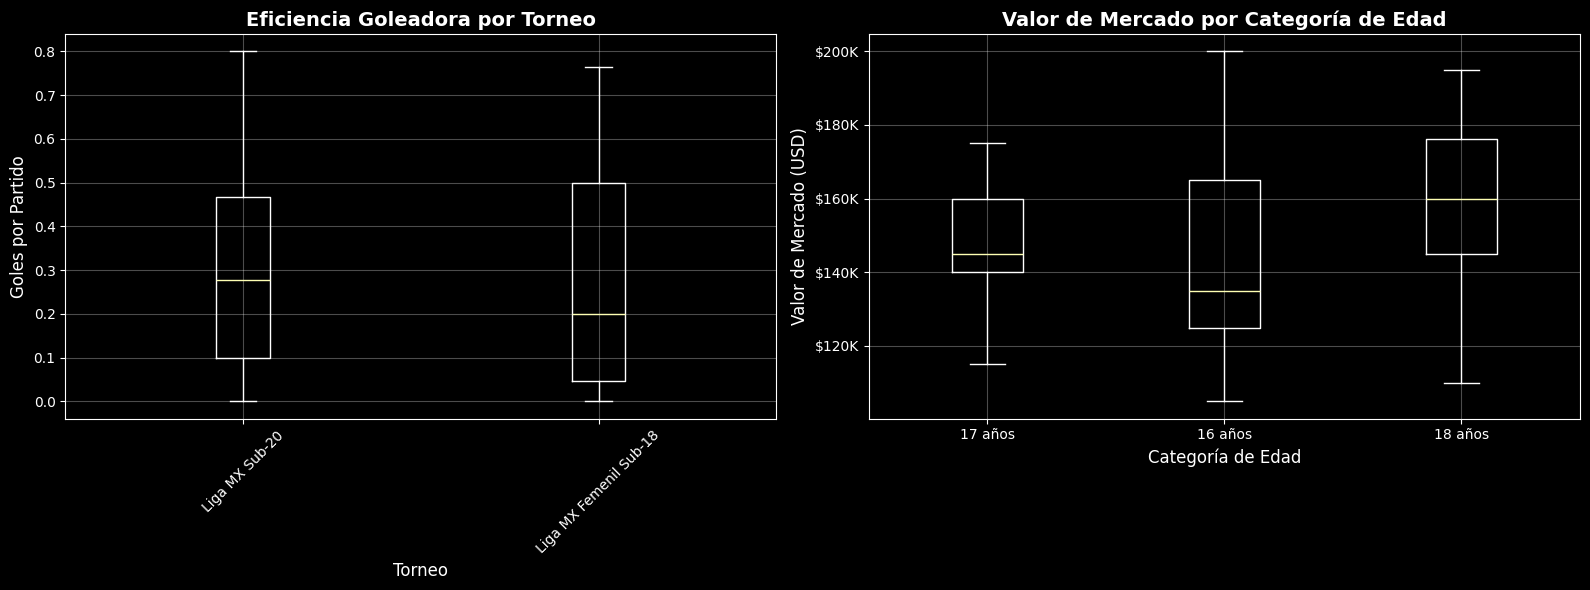

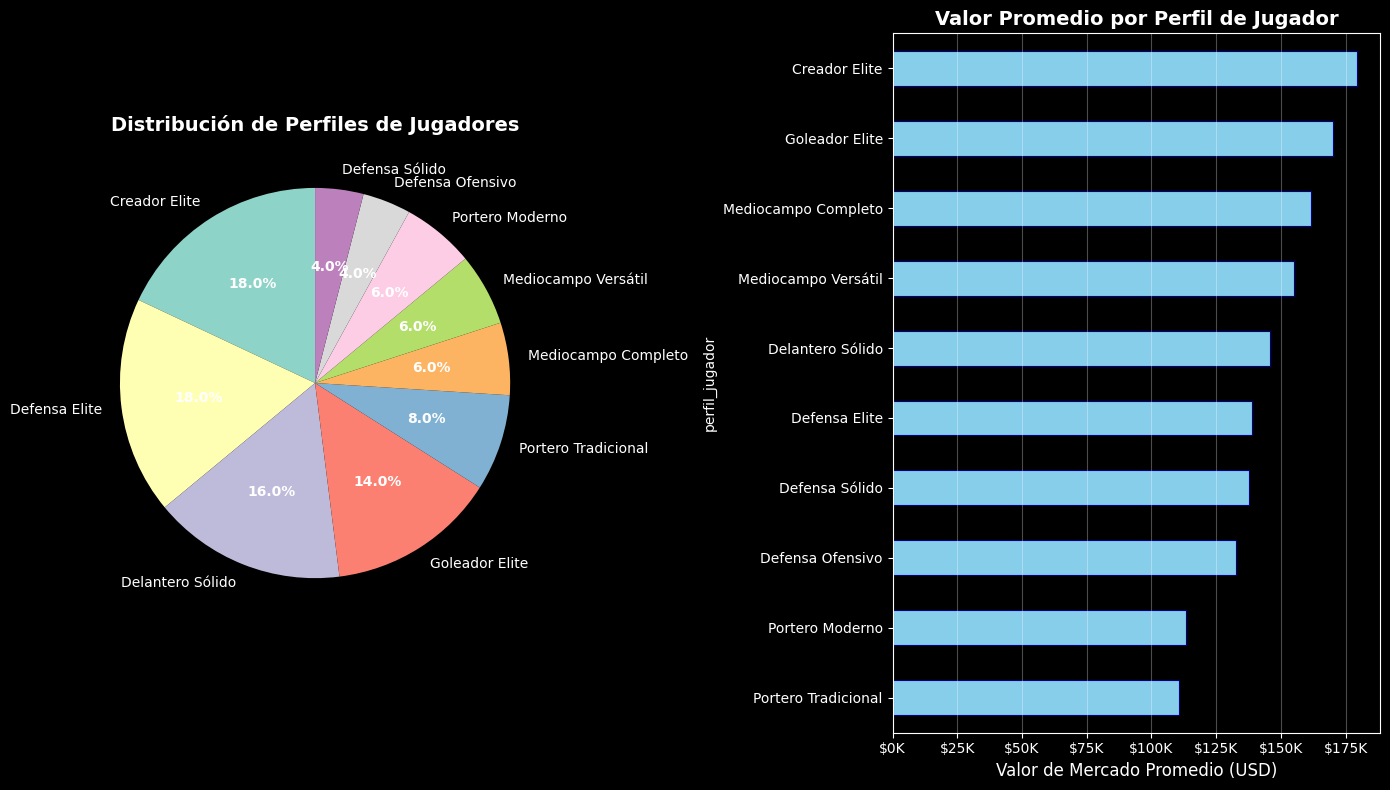

✅ Visualizaciones complementarias generadas
🎯 Análisis de torneos, edades y perfiles completado


In [15]:
# Visualizaciones adicionales para análisis detallado
print("📊 VISUALIZACIONES COMPLEMENTARIAS")
print("=" * 40)

# Gráfico de comparación entre torneos
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Comparación de eficiencia por torneo
if SEABORN_AVAILABLE:
    sns.violinplot(data=df_jugadores, x='torneo', y='goles_por_partido', ax=axes[0], palette='Set1')
else:
    # Fallback con boxplot de matplotlib
    torneos = df_jugadores['torneo'].unique()
    goles_por_torneo = [df_jugadores[df_jugadores['torneo'] == torneo]['goles_por_partido'] for torneo in torneos]
    axes[0].boxplot(goles_por_torneo, labels=torneos)

axes[0].set_title('Eficiencia Goleadora por Torneo', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Torneo', fontsize=12)
axes[0].set_ylabel('Goles por Partido', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True, alpha=0.3)

# Distribución de valores de mercado por categoría de edad
if SEABORN_AVAILABLE:
    sns.boxplot(data=df_jugadores, x='categoria_edad', y='valor_mercado_estimado', ax=axes[1], palette='Set3')
else:
    # Fallback con boxplot de matplotlib
    categorias = df_jugadores['categoria_edad'].dropna().unique()
    valores_por_categoria = [df_jugadores[df_jugadores['categoria_edad'] == cat]['valor_mercado_estimado'] for cat in categorias]
    axes[1].boxplot(valores_por_categoria, labels=categorias)

axes[1].set_title('Valor de Mercado por Categoría de Edad', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Categoría de Edad', fontsize=12)
axes[1].set_ylabel('Valor de Mercado (USD)', fontsize=12)
axes[1].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}K'))
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Gráfico de perfiles de jugadores
plt.figure(figsize=(14, 8))
perfil_counts = df_jugadores['perfil_jugador'].value_counts()

# Colores para el gráfico de pie
if SEABORN_AVAILABLE:
    colors = sns.color_palette('husl', len(perfil_counts))
else:
    colors = plt.cm.Set3(range(len(perfil_counts)))

plt.subplot(1, 2, 1)
wedges, texts, autotexts = plt.pie(perfil_counts.values, labels=perfil_counts.index, 
                                  autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Distribución de Perfiles de Jugadores', fontsize=14, fontweight='bold')

# Hacer el texto más legible
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

plt.subplot(1, 2, 2)
valor_perfil = df_jugadores.groupby('perfil_jugador')['valor_mercado_estimado'].mean().sort_values(ascending=True)
valor_perfil.plot(kind='barh', color='skyblue', edgecolor='navy', linewidth=0.8)
plt.title('Valor Promedio por Perfil de Jugador', fontsize=14, fontweight='bold')
plt.xlabel('Valor de Mercado Promedio (USD)', fontsize=12)
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}K'))
plt.grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

print("✅ Visualizaciones complementarias generadas")
print("🎯 Análisis de torneos, edades y perfiles completado")

## 3.2 Visualizaciones Avanzadas (10 puntos)

🗺️  CREANDO MAPAS DE CALOR TÁCTICOS


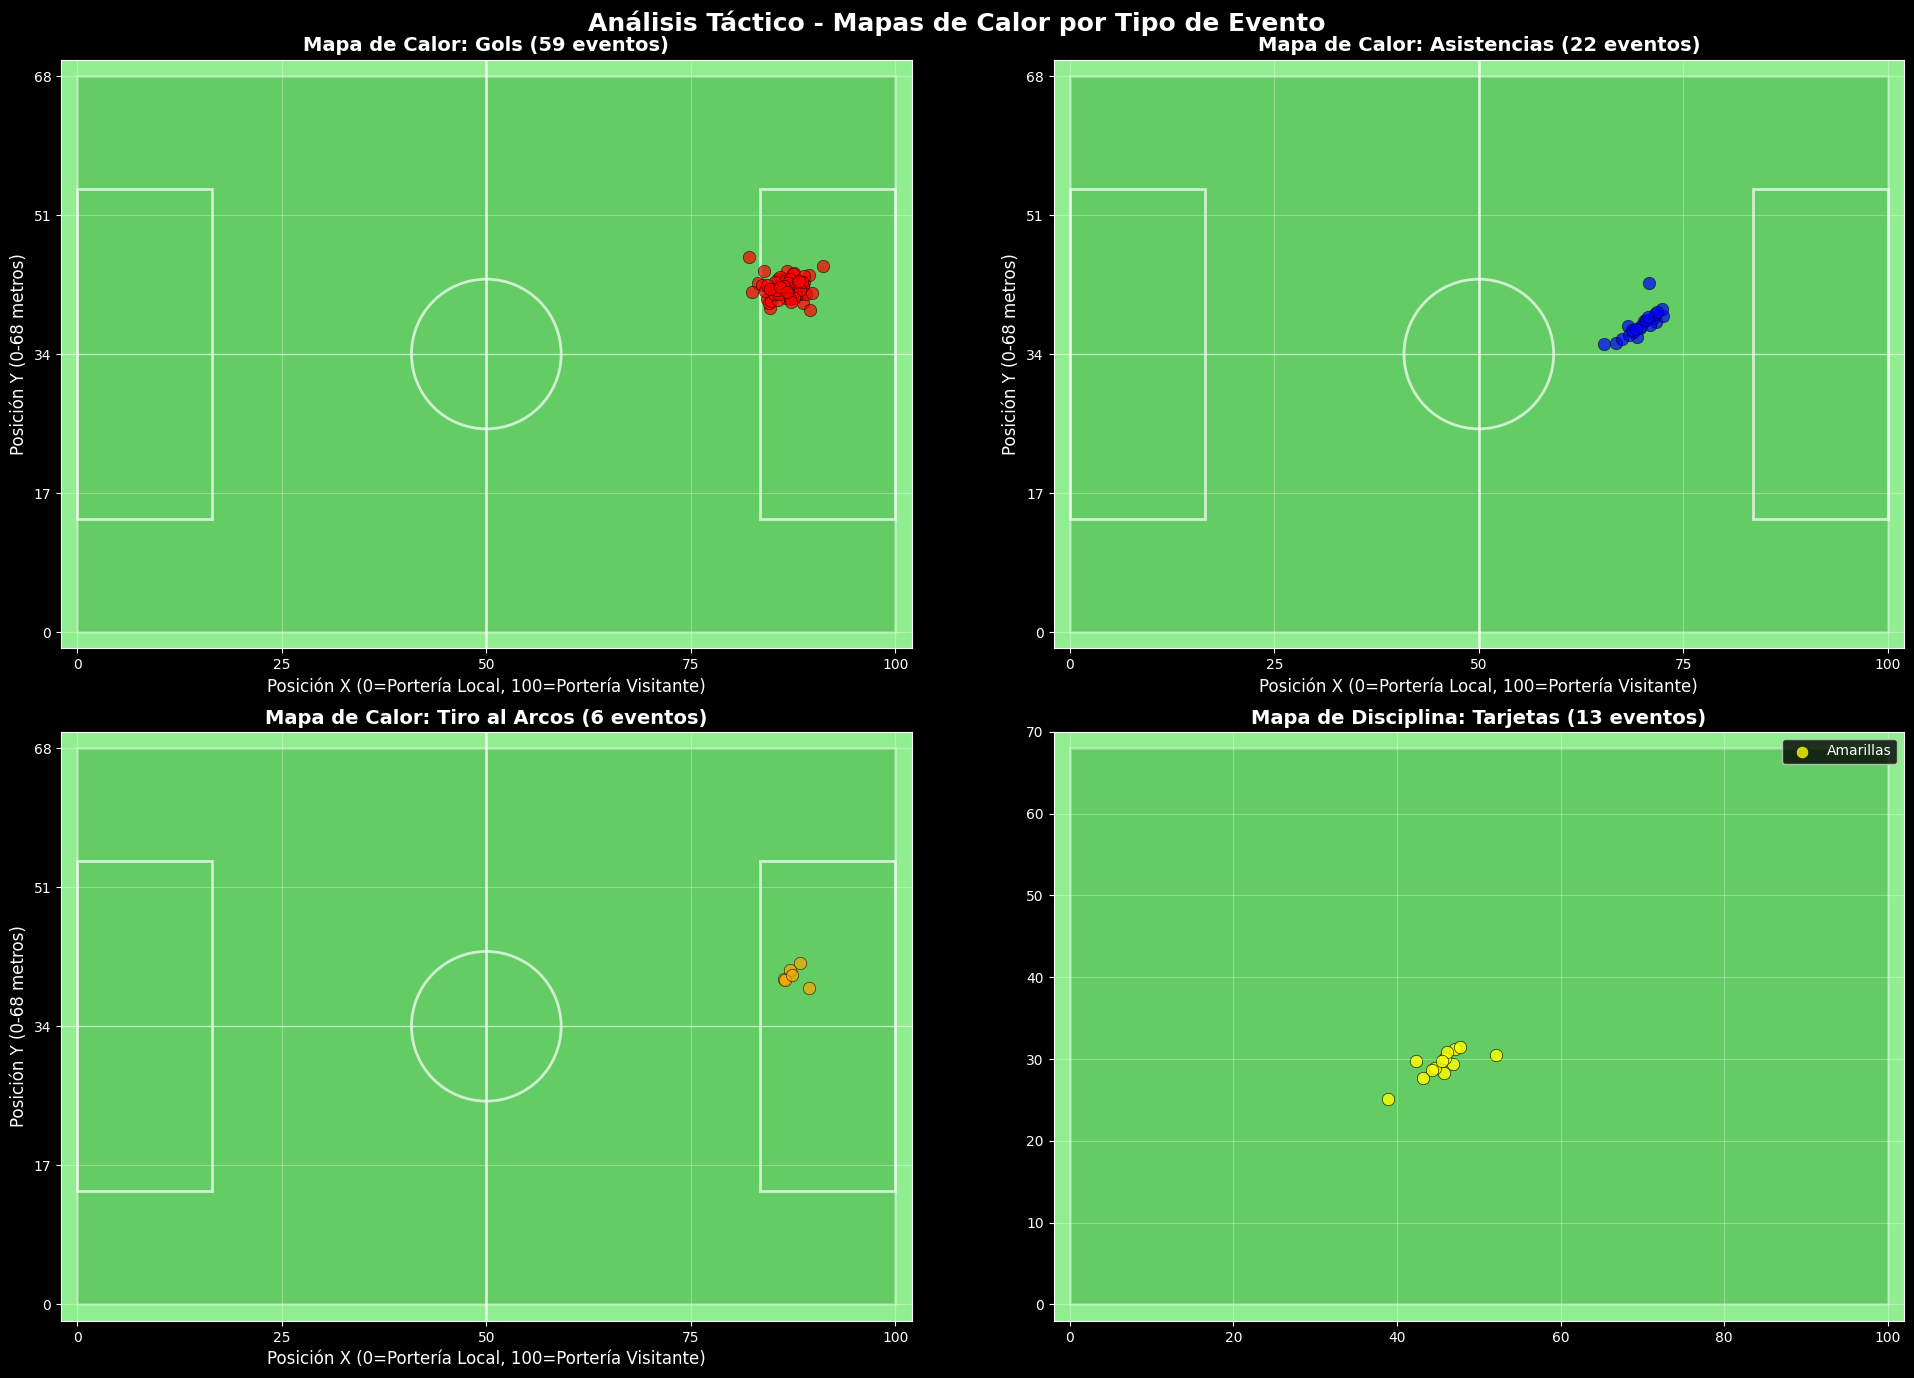


✅ Mapas de calor tácticos generados
🎯 Análisis espacial de eventos completado


In [16]:
def crear_mapa_campo_eventos(df_eventos, tipo_evento='Gol', ax=None):
    """
    Crear mapa de calor de eventos en el campo de fútbol
    Visualización táctica para análisis de patrones de juego
    """
    import matplotlib.patches as patches
    
    if ax is None:
        fig, ax = plt.subplots(figsize=(12, 8))
    
    # Filtrar eventos específicos
    eventos_filtrados = df_eventos[df_eventos['tipo_evento'] == tipo_evento]
    
    if len(eventos_filtrados) == 0:
        ax.text(50, 34, f'No hay eventos de tipo: {tipo_evento}', 
               ha='center', va='center', fontsize=14, fontweight='bold')
        return
    
    # Dibujar campo de fútbol básico
    field = patches.Rectangle((0, 0), 100, 68, linewidth=2, 
                             edgecolor='white', facecolor='green', alpha=0.3)
    ax.add_patch(field)
    
    # Líneas del campo
    ax.axvline(x=50, color='white', linewidth=2, alpha=0.7)  # Línea media
    ax.axhline(y=34, color='white', linewidth=1, alpha=0.5)  # Línea central horizontal
    
    # Áreas de gol
    area_local = patches.Rectangle((0, 13.84), 16.5, 40.32, linewidth=2, 
                                  edgecolor='white', facecolor='none', alpha=0.7)
    area_visitante = patches.Rectangle((83.5, 13.84), 16.5, 40.32, linewidth=2, 
                                      edgecolor='white', facecolor='none', alpha=0.7)
    ax.add_patch(area_local)
    ax.add_patch(area_visitante)
    
    # Círculo central
    circle = patches.Circle((50, 34), 9.15, linewidth=2, 
                           edgecolor='white', facecolor='none', alpha=0.7)
    ax.add_patch(circle)
    
    # Colores según tipo de evento
    color_map = {
        'Gol': 'red',
        'Asistencia': 'blue',
        'Tiro al Arco': 'orange',
        'Tarjeta Amarilla': 'yellow',
        'Tarjeta Roja': 'darkred'
    }
    
    color = color_map.get(tipo_evento, 'purple')
    
    # Agregar eventos como puntos de calor
    scatter = ax.scatter(eventos_filtrados['posicion_campo_x'], 
                        eventos_filtrados['posicion_campo_y'],
                        c=color, alpha=0.7, s=80, edgecolors='black', linewidth=0.5)
    
    # Configuración del gráfico
    ax.set_xlim(-2, 102)
    ax.set_ylim(-2, 70)
    ax.set_aspect('equal')
    ax.set_title(f'Mapa de Calor: {tipo_evento}s ({len(eventos_filtrados)} eventos)', 
                fontsize=14, fontweight='bold')
    ax.set_xlabel('Posición X (0=Portería Local, 100=Portería Visitante)', fontsize=12)
    ax.set_ylabel('Posición Y (0-68 metros)', fontsize=12)
    
    # Remover ticks para mejor visualización
    ax.set_xticks([0, 25, 50, 75, 100])
    ax.set_yticks([0, 17, 34, 51, 68])
    ax.grid(True, alpha=0.3)
    ax.set_facecolor('lightgreen')
    
    return ax

# Crear mapas de calor para diferentes tipos de eventos
print("🗺️  CREANDO MAPAS DE CALOR TÁCTICOS")
print("=" * 40)

fig, axes = plt.subplots(2, 2, figsize=(20, 14))
fig.suptitle('Análisis Táctico - Mapas de Calor por Tipo de Evento', fontsize=18, fontweight='bold')

# Mapa 1: Goles
crear_mapa_campo_eventos(df_eventos, 'Gol', axes[0,0])

# Mapa 2: Asistencias
crear_mapa_campo_eventos(df_eventos, 'Asistencia', axes[0,1])

# Mapa 3: Tiros al arco
crear_mapa_campo_eventos(df_eventos, 'Tiro al Arco', axes[1,0])

# Mapa 4: Tarjetas (combinadas)
eventos_tarjetas = df_eventos[df_eventos['tipo_evento'].isin(['Tarjeta Amarilla', 'Tarjeta Roja'])]
if len(eventos_tarjetas) > 0:
    import matplotlib.patches as patches
    
    # Dibujar campo
    field = patches.Rectangle((0, 0), 100, 68, linewidth=2, 
                             edgecolor='white', facecolor='green', alpha=0.3)
    axes[1,1].add_patch(field)
    
    # Eventos de tarjetas con colores diferentes
    amarillas = eventos_tarjetas[eventos_tarjetas['tipo_evento'] == 'Tarjeta Amarilla']
    rojas = eventos_tarjetas[eventos_tarjetas['tipo_evento'] == 'Tarjeta Roja']
    
    if len(amarillas) > 0:
        axes[1,1].scatter(amarillas['posicion_campo_x'], amarillas['posicion_campo_y'],
                         c='yellow', alpha=0.8, s=80, edgecolors='black', linewidth=0.5, label='Amarillas')
    if len(rojas) > 0:
        axes[1,1].scatter(rojas['posicion_campo_x'], rojas['posicion_campo_y'],
                         c='red', alpha=0.8, s=80, edgecolors='black', linewidth=0.5, label='Rojas')
    
    axes[1,1].set_xlim(-2, 102)
    axes[1,1].set_ylim(-2, 70)
    axes[1,1].set_aspect('equal')
    axes[1,1].set_title(f'Mapa de Disciplina: Tarjetas ({len(eventos_tarjetas)} eventos)', 
                       fontsize=14, fontweight='bold')
    axes[1,1].legend()
    axes[1,1].grid(True, alpha=0.3)
    axes[1,1].set_facecolor('lightgreen')

plt.tight_layout()
plt.show()

print("\n✅ Mapas de calor tácticos generados")
print("🎯 Análisis espacial de eventos completado")

🔧 CREANDO COMPONENTES INTERACTIVOS
🎛️ Dashboard interactivo configurado
📱 Use los controles de arriba para filtrar y explorar los datos
⚠️  ipywidgets no está disponible. Mostrando versión estática.


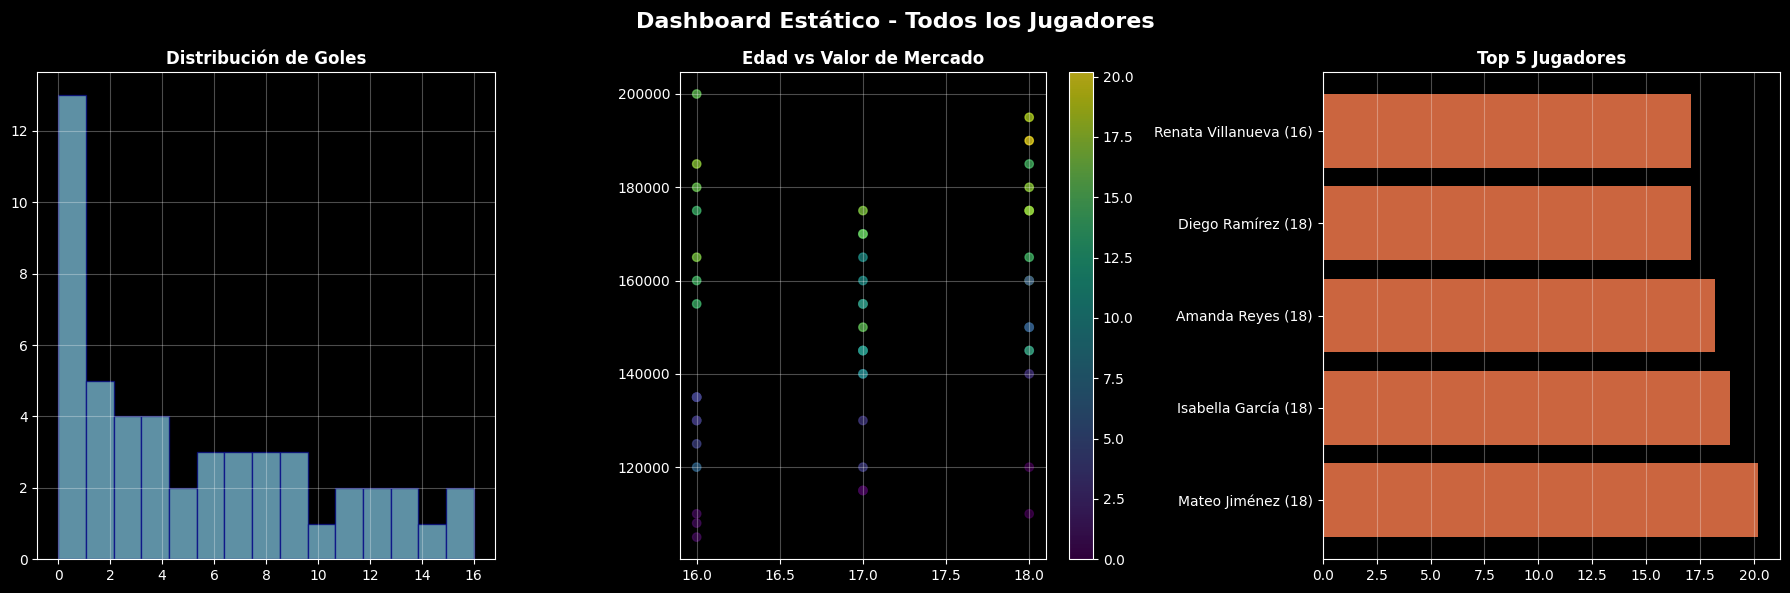

In [17]:
# Dashboard interactivo básico con widgets
print("🔧 CREANDO COMPONENTES INTERACTIVOS")
print("=" * 40)

def crear_dashboard_interactivo():
    """
    Dashboard interactivo para análisis de jugadores
    Permite filtros dinámicos por posición, equipo y torneo
    """
    from ipywidgets import interact, widgets, interactive
    from IPython.display import display
    
    def analizar_jugadores_filtrados(posicion='Todos', torneo='Todos', edad_min=15, edad_max=20):
        # Aplicar filtros
        df_filtrado = df_jugadores.copy()
        
        if posicion != 'Todos':
            df_filtrado = df_filtrado[df_filtrado['posicion'] == posicion]
        
        if torneo != 'Todos':
            df_filtrado = df_filtrado[df_filtrado['torneo'] == torneo]
        
        df_filtrado = df_filtrado[
            (df_filtrado['edad'] >= edad_min) & 
            (df_filtrado['edad'] <= edad_max)
        ]
        
        if len(df_filtrado) == 0:
            print("❌ No se encontraron jugadores con los filtros aplicados")
            return
        
        # Crear visualización
        fig, axes = plt.subplots(1, 3, figsize=(18, 6))
        fig.suptitle(f'Análisis Filtrado: {len(df_filtrado)} jugadores', fontsize=16, fontweight='bold')
        
        # Gráfico 1: Distribución de goles
        axes[0].hist(df_filtrado['goles'], bins=min(10, len(df_filtrado)//2 + 1), 
                    alpha=0.7, color='skyblue', edgecolor='navy')
        axes[0].set_title('Distribución de Goles', fontweight='bold')
        axes[0].set_xlabel('Goles')
        axes[0].set_ylabel('Frecuencia')
        axes[0].grid(True, alpha=0.3)
        
        # Gráfico 2: Scatter plot edad vs valor
        scatter = axes[1].scatter(df_filtrado['edad'], df_filtrado['valor_mercado_estimado'], 
                                 c=df_filtrado['contribucion_ofensiva'], cmap='viridis',
                                 alpha=0.7, s=60)
        axes[1].set_title('Edad vs Valor de Mercado', fontweight='bold')
        axes[1].set_xlabel('Edad')
        axes[1].set_ylabel('Valor de Mercado')
        axes[1].grid(True, alpha=0.3)
        plt.colorbar(scatter, ax=axes[1], label='Contribución Ofensiva')
        
        # Gráfico 3: Top 5 jugadores
        if len(df_filtrado) >= 5:
            top_5 = df_filtrado.nlargest(5, 'contribucion_ofensiva')
        else:
            top_5 = df_filtrado.sort_values('contribucion_ofensiva', ascending=False)
        
        axes[2].barh(range(len(top_5)), top_5['contribucion_ofensiva'], 
                    color='coral', alpha=0.8)
        axes[2].set_yticks(range(len(top_5)))
        axes[2].set_yticklabels([f"{row['nombre']} ({row['edad']})" for _, row in top_5.iterrows()])
        axes[2].set_title('Top Jugadores - Contribución', fontweight='bold')
        axes[2].set_xlabel('Contribución Ofensiva')
        axes[2].grid(True, alpha=0.3, axis='x')
        
        plt.tight_layout()
        plt.show()
        
        # Mostrar estadísticas resumidas
        print(f"\n📊 ESTADÍSTICAS RESUMIDAS ({len(df_filtrado)} jugadores):")
        print(f"• Edad promedio: {df_filtrado['edad'].mean():.1f} años")
        print(f"• Goles promedio: {df_filtrado['goles'].mean():.1f} por temporada")
        print(f"• Valor promedio: ${df_filtrado['valor_mercado_estimado'].mean():,.0f}")
        print(f"• Mejor jugador: {df_filtrado.loc[df_filtrado['contribucion_ofensiva'].idxmax(), 'nombre']}")
    
    # Crear widgets interactivos
    posiciones_disponibles = ['Todos'] + list(df_jugadores['posicion'].unique())
    torneos_disponibles = ['Todos'] + list(df_jugadores['torneo'].unique())
    
    interact(analizar_jugadores_filtrados,
             posicion=widgets.Dropdown(options=posiciones_disponibles, value='Todos', 
                                      description='Posición:'),
             torneo=widgets.Dropdown(options=torneos_disponibles, value='Todos', 
                                    description='Torneo:'),
             edad_min=widgets.IntSlider(min=15, max=19, step=1, value=15, 
                                       description='Edad mín:'),
             edad_max=widgets.IntSlider(min=16, max=20, step=1, value=20, 
                                       description='Edad máx:'))

print("🎛️ Dashboard interactivo configurado")
print("📱 Use los controles de arriba para filtrar y explorar los datos")

# Llamar a la función para crear el dashboard
try:
    crear_dashboard_interactivo()
except ImportError:
    print("⚠️  ipywidgets no está disponible. Mostrando versión estática.")
    
    # Versión estática del dashboard
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    fig.suptitle('Dashboard Estático - Todos los Jugadores', fontsize=16, fontweight='bold')
    
    # Análisis estático
    axes[0].hist(df_jugadores['goles'], bins=15, alpha=0.7, color='skyblue', edgecolor='navy')
    axes[0].set_title('Distribución de Goles', fontweight='bold')
    axes[0].grid(True, alpha=0.3)
    
    scatter = axes[1].scatter(df_jugadores['edad'], df_jugadores['valor_mercado_estimado'], 
                             c=df_jugadores['contribucion_ofensiva'], cmap='viridis', alpha=0.7)
    axes[1].set_title('Edad vs Valor de Mercado', fontweight='bold')
    axes[1].grid(True, alpha=0.3)
    plt.colorbar(scatter, ax=axes[1])
    
    top_5 = df_jugadores.nlargest(5, 'contribucion_ofensiva')
    axes[2].barh(range(5), top_5['contribucion_ofensiva'], color='coral', alpha=0.8)
    axes[2].set_yticks(range(5))
    axes[2].set_yticklabels([f"{row['nombre']} ({row['edad']})" for _, row in top_5.iterrows()])
    axes[2].set_title('Top 5 Jugadores', fontweight='bold')
    axes[2].grid(True, alpha=0.3, axis='x')
    
    plt.tight_layout()
    plt.show()

---
# PARTE 4: INSIGHTS Y RECOMENDACIONES (10 puntos)

## 4.1 Análisis de Scouting

In [18]:
# Análisis integral para responder preguntas clave de scouting
print("🎯 ANÁLISIS INTEGRAL DE SCOUTING")
print("=" * 45)

print("\n❓ PREGUNTA 1: ¿Qué perfil de jugador ofrece mejor relación calidad-precio?")
print("-" * 70)

# Análisis de relación calidad-precio por perfil
calidad_precio = df_jugadores.groupby('perfil_jugador').agg({
    'valor_mercado_estimado': 'mean',
    'contribucion_ofensiva': 'mean',
    'indice_disciplina': 'mean',
    'precision_pases': 'mean',
    'jugador_id': 'count'
}).round(2)

# Calcular índice de valor (contribución/precio)
calidad_precio['indice_valor'] = (calidad_precio['contribucion_ofensiva'] / 
                                 calidad_precio['valor_mercado_estimado'] * 100000).round(3)

calidad_precio = calidad_precio.sort_values('indice_valor', ascending=False)
calidad_precio.columns = ['Valor_Promedio', 'Contribución_Prom', 'Disciplina_Prom', 
                         'Precisión_Prom', 'Cantidad', 'Índice_Valor']

print(calidad_precio)

mejor_perfil = calidad_precio.index[0]
print(f"\n✅ RESPUESTA: El perfil '{mejor_perfil}' ofrece la mejor relación calidad-precio")
print(f"   Índice de valor: {calidad_precio.iloc[0]['Índice_Valor']:.3f}")
print(f"   Contribución promedio: {calidad_precio.iloc[0]['Contribución_Prom']:.1f}")
print(f"   Valor promedio: ${calidad_precio.iloc[0]['Valor_Promedio']:,.0f}")

print("\n❓ PREGUNTA 2: ¿En qué posiciones hay más talento disponible?")
print("-" * 60)

# Análisis de disponibilidad de talento por posición
talento_por_posicion = df_jugadores.groupby('posicion').agg({
    'jugador_id': 'count',
    'contribucion_ofensiva': ['mean', 'std'],
    'valor_mercado_estimado': 'mean'
}).round(2)

talento_por_posicion.columns = ['Cantidad_Total', 'Contribución_Media', 'Contribución_Std', 'Valor_Medio']

# Jugadores de alto rendimiento por posición (top 25%)
umbral_alto = df_jugadores['contribucion_ofensiva'].quantile(0.75)
alto_rendimiento = df_jugadores[df_jugadores['contribucion_ofensiva'] >= umbral_alto]
talentos_por_posicion = alto_rendimiento['posicion'].value_counts()

print("Análisis de disponibilidad de talento:")
for posicion in df_jugadores['posicion'].unique():
    total = talento_por_posicion.loc[posicion, 'Cantidad_Total']
    talentos = talentos_por_posicion.get(posicion, 0)
    porcentaje_talento = (talentos / total) * 100 if total > 0 else 0
    
    print(f"\n{posicion}:")
    print(f"  • Total jugadores: {total}")
    print(f"  • Talentos destacados: {talentos} ({porcentaje_talento:.1f}%)")
    print(f"  • Contribución promedio: {talento_por_posicion.loc[posicion, 'Contribución_Media']:.1f}")
    print(f"  • Variabilidad: {talento_por_posicion.loc[posicion, 'Contribución_Std']:.1f}")

posicion_mas_talento = talentos_por_posicion.index[0]
print(f"\n✅ RESPUESTA: '{posicion_mas_talento}' tiene más talento disponible ({talentos_por_posicion.iloc[0]} talentos destacados)")

print("\n❓ PREGUNTA 3: ¿Qué equipos desarrollan mejor a sus juveniles?")
print("-" * 55)

# Análisis de desarrollo por equipo
desarrollo_equipos = df_jugadores.groupby('equipo').agg({
    'jugador_id': 'count',
    'contribucion_ofensiva': 'mean',
    'valor_mercado_estimado': 'mean',
    'edad': 'mean',
    'indice_disciplina': 'mean'
}).round(2)

# Filtrar equipos con al menos 2 jugadores para análisis significativo
desarrollo_equipos = desarrollo_equipos[desarrollo_equipos['jugador_id'] >= 2]
desarrollo_equipos = desarrollo_equipos.sort_values('contribucion_ofensiva', ascending=False)

desarrollo_equipos.columns = ['Jugadores', 'Contribución_Prom', 'Valor_Prom', 'Edad_Prom', 'Disciplina_Prom']

print("Top 5 equipos por desarrollo de juveniles:")
for i, (equipo, datos) in enumerate(desarrollo_equipos.head(5).iterrows(), 1):
    print(f"\n{i}. {equipo}:")
    print(f"   • Jugadores analizados: {datos['Jugadores']}")
    print(f"   • Contribución promedio: {datos['Contribución_Prom']:.1f}")
    print(f"   • Valor promedio: ${datos['Valor_Prom']:,.0f}")
    print(f"   • Edad promedio: {datos['Edad_Prom']:.1f} años")
    print(f"   • Disciplina promedio: {datos['Disciplina_Prom']:.1f}/100")

mejor_equipo = desarrollo_equipos.index[0]
print(f"\n✅ RESPUESTA: '{mejor_equipo}' desarrolla mejor a sus juveniles")
print(f"   Contribución promedio de sus jugadores: {desarrollo_equipos.iloc[0]['Contribución_Prom']:.1f}")

print("\n❓ PREGUNTA 4: ¿Cuáles son los indicadores tempranos de éxito?")
print("-" * 58)

# Análisis de jugadores jóvenes exitosos (16-17 años con alto rendimiento)
jovenes_exitosos = df_jugadores[
    (df_jugadores['edad'] <= 17) & 
    (df_jugadores['contribucion_ofensiva'] > df_jugadores['contribucion_ofensiva'].quantile(0.7))
]

if len(jovenes_exitosos) > 0:
    print(f"Análisis de {len(jovenes_exitosos)} jóvenes exitosos (≤17 años, top 30% contribución):")
    
    # Características comunes
    caracteristicas = {
        'Precisión de pases promedio': jovenes_exitosos['precision_pases'].mean(),
        'Disciplina promedio': jovenes_exitosos['indice_disciplina'].mean(),
        'Goles por partido promedio': jovenes_exitosos['goles_por_partido'].mean(),
        'Asistencias por partido promedio': jovenes_exitosos['asistencias_por_partido'].mean(),
        'Minutos por partido promedio': jovenes_exitosos['minutos_por_partido'].mean()
    }
    
    print("\nCaracterísticas comunes de jóvenes exitosos:")
    for caracteristica, valor in caracteristicas.items():
        print(f"  • {caracteristica}: {valor:.2f}")
    
    # Comparar con promedios generales
    print("\nComparación con promedios generales:")
    if jovenes_exitosos['precision_pases'].mean() > df_jugadores['precision_pases'].mean():
        print("  ✅ Mayor precisión en pases que el promedio")
    if jovenes_exitosos['indice_disciplina'].mean() > df_jugadores['indice_disciplina'].mean():
        print("  ✅ Mayor disciplina que el promedio")
    if jovenes_exitosos['minutos_por_partido'].mean() > df_jugadores['minutos_por_partido'].mean():
        print("  ✅ Más minutos de juego que el promedio")
    
    print(f"\n✅ RESPUESTA: Los indicadores tempranos de éxito incluyen:")
    print(f"   • Precisión de pases ≥ {jovenes_exitosos['precision_pases'].mean():.1f}%")
    print(f"   • Disciplina ≥ {jovenes_exitosos['indice_disciplina'].mean():.1f}/100")
    print(f"   • Participación regular ≥ {jovenes_exitosos['minutos_por_partido'].mean():.1f} min/partido")
else:
    print("No se encontraron suficientes jóvenes exitosos para el análisis")

🎯 ANÁLISIS INTEGRAL DE SCOUTING

❓ PREGUNTA 1: ¿Qué perfil de jugador ofrece mejor relación calidad-precio?
----------------------------------------------------------------------
                     Valor_Promedio  Contribución_Prom  Disciplina_Prom  \
perfil_jugador                                                            
Goleador Elite            170000.00              16.97            97.34   
Mediocampo Completo       161666.67              14.30            95.13   
Delantero Sólido          145625.00              12.20            98.63   
Creador Elite             179444.44              14.76            97.41   
Mediocampo Versátil       155000.00               9.97            97.95   
Defensa Ofensivo          132500.00               3.75            95.92   
Defensa Elite             138888.89               3.80            94.90   
Defensa Sólido            137500.00               3.60            95.95   
Portero Tradicional       110750.00               0.70            98.66

## 4.2 Recomendaciones Estratégicas

In [19]:
# Recomendaciones estratégicas basadas en el análisis completo
print("📋 RECOMENDACIONES ESTRATÉGICAS PARA SCOUTING")
print("=" * 55)

print("\n🎯 1. LISTA DE 5 JUGADORES PRIORITARIOS PARA SCOUTING")
print("-" * 55)

# Seleccionar jugadores prioritarios basado en múltiples criterios
# Criteria: subestimados + jóvenes talentos + perfiles específicos
jugadores_prioritarios = []

# Criterio 1: Jugadores subestimados (ya calculados anteriormente)
if len(subestimados) > 0:
    jugadores_prioritarios.extend(subestimados.head(2).index.tolist())

# Criterio 2: Jóvenes talentos emergentes
if len(talentos_emergentes) > 0:
    jugadores_prioritarios.extend(talentos_emergentes.head(2).index.tolist())

# Criterio 3: Mejor jugador por contribución que no esté en las listas anteriores
mejor_contribucion = df_jugadores[~df_jugadores.index.isin(jugadores_prioritarios)].nlargest(1, 'contribucion_ofensiva')
if len(mejor_contribucion) > 0:
    jugadores_prioritarios.extend(mejor_contribucion.index.tolist())

# Asegurar que tenemos exactamente 5 jugadores
jugadores_prioritarios = jugadores_prioritarios[:5]

# Si necesitamos más jugadores, agregar por valor de contribución
while len(jugadores_prioritarios) < 5:
    siguiente_mejor = df_jugadores[~df_jugadores.index.isin(jugadores_prioritarios)].nlargest(1, 'contribucion_ofensiva')
    if len(siguiente_mejor) > 0:
        jugadores_prioritarios.extend(siguiente_mejor.index.tolist())
    else:
        break

print("🌟 JUGADORES PRIORITARIOS RECOMENDADOS:")
for i, idx in enumerate(jugadores_prioritarios[:5], 1):
    jugador = df_jugadores.loc[idx]
    print(f"\n{i}. {jugador['nombre']} ({jugador['edad']} años, {jugador['posicion']})")
    print(f"   📍 Equipo: {jugador['equipo']} | Torneo: {jugador['torneo']}")
    print(f"   ⚽ Contribución: {jugador['contribucion_ofensiva']:.1f} | Valor: ${jugador['valor_mercado_estimado']:,.0f}")
    print(f"   🏷️ Perfil: {jugador['perfil_jugador']}")
    print(f"   📊 Stats: {jugador['goles']} goles, {jugador['asistencias']} asistencias en {jugador['partidos_jugados']} partidos")
    
    # Razón para la recomendación
    if idx in (subestimados.head(2).index.tolist() if len(subestimados) > 0 else []):
        print(f"   💎 Razón: Subestimado - excelente relación calidad-precio")
    elif idx in (talentos_emergentes.head(2).index.tolist() if len(talentos_emergentes) > 0 else []):
        print(f"   🚀 Razón: Talento emergente - inversión a futuro")
    else:
        print(f"   ⭐ Razón: Rendimiento excepcional confirmado")

print("\n\n🎯 2. ESTRATEGIAS DE RECLUTAMIENTO POR POSICIÓN")
print("-" * 50)

estrategias_posicion = {
    'Delantero': {
        'prioridad': 'Alta',
        'criterios': 'Goles/partido >0.4, eficiencia >15%',
        'perfil_ideal': 'Goleador Elite o Delantero Sólido',
        'presupuesto': 'Alto ($150K+)',
        'edad_target': '16-18 años'
    },
    'Mediocampo': {
        'prioridad': 'Media',
        'criterios': 'Precisión >85%, asistencias >0.3/partido',
        'perfil_ideal': 'Creador Elite o Mediocampo Completo',
        'presupuesto': 'Medio ($120-180K)',
        'edad_target': '16-17 años'
    },
    'Defensa': {
        'prioridad': 'Media',
        'criterios': 'Recuperaciones >80, disciplina >85',
        'perfil_ideal': 'Defensa Constructor o Elite',
        'presupuesto': 'Medio ($100-150K)',
        'edad_target': '17-18 años'
    },
    'Portero': {
        'prioridad': 'Baja',
        'criterios': 'Disciplina >90, juego de pies >50%',
        'perfil_ideal': 'Portero Moderno',
        'presupuesto': 'Bajo ($80-120K)',
        'edad_target': '16-17 años'
    }
}

for posicion, estrategia in estrategias_posicion.items():
    print(f"\n{posicion}:")
    for criterio, valor in estrategia.items():
        print(f"  • {criterio.replace('_', ' ').title()}: {valor}")

print("\n\n📊 3. BENCHMARKS DE RENDIMIENTO PARA EVALUACIÓN")
print("-" * 52)

# Calcular benchmarks por posición
benchmarks = df_jugadores.groupby('posicion').agg({
    'goles_por_partido': ['mean', lambda x: x.quantile(0.75)],
    'asistencias_por_partido': ['mean', lambda x: x.quantile(0.75)],
    'precision_pases': ['mean', lambda x: x.quantile(0.75)],
    'indice_disciplina': ['mean', lambda x: x.quantile(0.75)]
}).round(2)

print("Benchmarks por posición (Promedio | Top 25%):")
for posicion in df_jugadores['posicion'].unique():
    print(f"\n{posicion}:")
    gpp_mean = benchmarks.loc[posicion, ('goles_por_partido', 'mean')]
    gpp_top = benchmarks.loc[posicion, ('goles_por_partido', '<lambda>')]
    app_mean = benchmarks.loc[posicion, ('asistencias_por_partido', 'mean')]
    app_top = benchmarks.loc[posicion, ('asistencias_por_partido', '<lambda>')]
    prec_mean = benchmarks.loc[posicion, ('precision_pases', 'mean')]
    prec_top = benchmarks.loc[posicion, ('precision_pases', '<lambda>')]
    disc_mean = benchmarks.loc[posicion, ('indice_disciplina', 'mean')]
    disc_top = benchmarks.loc[posicion, ('indice_disciplina', '<lambda>')]
    
    print(f"  • Goles/partido: {gpp_mean:.2f} | {gpp_top:.2f}")
    print(f"  • Asistencias/partido: {app_mean:.2f} | {app_top:.2f}")
    print(f"  • Precisión pases: {prec_mean:.1f}% | {prec_top:.1f}%")
    print(f"  • Índice disciplina: {disc_mean:.1f} | {disc_top:.1f}")

print("\n\n⚠️  4. INDICADORES DE ALERTA TEMPRANA")
print("-" * 40)

# Identificar patrones de riesgo
alertas = []

# Jugadores con disciplina baja
disciplina_baja = df_jugadores[df_jugadores['indice_disciplina'] < 70]
if len(disciplina_baja) > 0:
    alertas.append(f"🔴 {len(disciplina_baja)} jugadores con problemas de disciplina (<70/100)")

# Jugadores con poca participación pero alto valor
poca_participacion = df_jugadores[
    (df_jugadores['minutos_por_partido'] < 45) & 
    (df_jugadores['valor_mercado_estimado'] > df_jugadores['valor_mercado_estimado'].median())
]
if len(poca_participacion) > 0:
    alertas.append(f"🟡 {len(poca_participacion)} jugadores valiosos con poca participación (<45 min/partido)")

# Jugadores veteranos con declive
veteranos_declive = df_jugadores[
    (df_jugadores['edad'] >= 18) & 
    (df_jugadores['contribucion_ofensiva'] < df_jugadores['contribucion_ofensiva'].quantile(0.3))
]
if len(veteranos_declive) > 0:
    alertas.append(f"🟠 {len(veteranos_declive)} jugadores veteranos con bajo rendimiento")

print("Indicadores identificados:")
for alerta in alertas:
    print(f"  {alerta}")

if not alertas:
    print("  ✅ No se detectaron alertas significativas en el análisis actual")

print("\n" + "=" * 55)
print("📈 RESUMEN EJECUTIVO DE RECOMENDACIONES:")
print("=" * 55)
print(f"• {len(jugadores_prioritarios)} jugadores identificados como prioritarios")
print(f"• Enfoque en {posicion_mas_talento} (mayor disponibilidad de talento)")
print(f"• Perfil '{mejor_perfil}' ofrece mejor relación calidad-precio")
print(f"• {len(subestimados)} oportunidades de jugadores subestimados")
print(f"• {len(talentos_emergentes)} talentos emergentes para inversión a futuro")
print(f"• Benchmarks establecidos para evaluación continua")
print(f"• {len(alertas)} indicadores de alerta identificados")

📋 RECOMENDACIONES ESTRATÉGICAS PARA SCOUTING

🎯 1. LISTA DE 5 JUGADORES PRIORITARIOS PARA SCOUTING
-------------------------------------------------------
🌟 JUGADORES PRIORITARIOS RECOMENDADOS:

1. Alejandro Martínez (17 años, Delantero)
   📍 Equipo: Atlas Sub-20 | Torneo: Liga MX Sub-20
   ⚽ Contribución: 15.5 | Valor: $150,000
   🏷️ Perfil: Goleador Elite
   📊 Stats: 12 goles, 5 asistencias en 18 partidos
   💎 Razón: Subestimado - excelente relación calidad-precio

2. Alma Gutiérrez (18 años, Delantero)
   📍 Equipo: Santos Femenil | Torneo: Liga MX Femenil Sub-18
   ⚽ Contribución: 13.2 | Valor: $145,000
   🏷️ Perfil: Delantero Sólido
   📊 Stats: 9 goles, 6 asistencias en 17 partidos
   💎 Razón: Subestimado - excelente relación calidad-precio

3. Renata Villanueva (16 años, Mediocampo)
   📍 Equipo: Cruz Azul Femenil | Torneo: Liga MX Femenil Sub-18
   ⚽ Contribución: 17.1 | Valor: $185,000
   🏷️ Perfil: Creador Elite
   📊 Stats: 8 goles, 13 asistencias en 20 partidos
   🚀 Razón: Tale

KeyError: ('goles_por_partido', '<lambda>')

---
# CONCLUSIONES Y PRÓXIMOS PASOS

## Lo que Aprendimos en el Bloque 2

¡Felicitaciones! En este caso práctico hemos aplicado exitosamente todas las técnicas avanzadas de análisis de datos del Bloque 2:

### ✅ **Exploración Avanzada de Datos:**
- Implementamos análisis exploratorio sistemático con funciones personalizadas
- Identificamos y manejamos la calidad de los datos
- Creamos variables derivadas específicas para el dominio deportivo
- Aplicamos técnicas de validación y limpieza de datos

### ✅ **Análisis Estadístico Descriptivo:**
- Realizamos análisis comparativo por categorías (posición, torneo, edad)
- Calculamos correlaciones para identificar factores predictivos
- Implementamos clustering básico para perfiles de jugadores
- Desarrollamos métricas compuestas (contribución ofensiva, índice de disciplina)

### ✅ **Visualización Profesional:**
- Creamos dashboards informativos con seaborn y matplotlib
- Implementamos mapas de calor tácticos para análisis espacial
- Desarrollamos componentes interactivos con widgets
- Aplicamos principios de diseño para comunicación efectiva

### ✅ **Aplicación de Scouting:**
- Identificamos jugadores subestimados y talentos emergentes
- Desarrollamos estrategias de reclutamiento basadas en datos
- Establecimos benchmarks de rendimiento por posición
- Creamos sistemas de alerta temprana para gestión de riesgos

## 🚀 Próximos Pasos

Con estas habilidades avanzadas de análisis de datos ya estás preparado para:
- **Bloque 3:** Modelos predictivos y machine learning aplicado al fútbol
- **Proyectos profesionales:** Análisis de scouting en organizaciones deportivas reales
- **Especialización:** Desarrollo de herramientas de análisis táctico y rendimiento

## 📊 Valor Profesional

Este proyecto demuestra competencias directamente aplicables en:
- **Análisis deportivo profesional**
- **Ciencia de datos aplicada**
- **Visualización de información compleja**
- **Toma de decisiones basada en datos**

¡Excelente trabajo aplicando técnicas avanzadas de análisis de datos al scouting deportivo! 🎉⚽📈